### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


Data needs to be cleaned up before it can be analyzed. I'm going to check the structure of my data

In [5]:
# quick check for data structure
str(ny)

'data.frame':	54770 obs. of  9 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 54568 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 54562 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: int  795 692 1325 703 329 998 478 4038 5132 309 ...
 $ Start.Station: Factor w/ 636 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 638 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...


In [6]:
str(wash)

'data.frame':	89051 obs. of  7 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...


In [7]:
str(chi)

'data.frame':	8630 obs. of  9 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 2 3 3 3 3 2 1 3 3 ...
 $ Birth.Year   : num  1992 1992 1981 1986 1975 ...


In [8]:
# import library to analyze data
library(dplyr)
library(ggplot2)
library(lubridate)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Washington doesn't have gender and birth year. I'm going to add them to the dataframe so I can merge all 3 together later

In [9]:
wash$Gender <- NA

In [10]:
wash$Birth.Year <- NA

In [11]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA


To make it easier to analyze later, I'm going to add a new column called 'City' to the dataframe. I'll merge 3 dataframes together later.

In [12]:
# add column 'City' and assign city name to the column
ny$City <- 'New York'
wash$City <- 'Washington'
chi$City <- 'Chicago'

In [13]:
df <- rbind(ny, wash, chi)

In [14]:
str(df)

'data.frame':	152451 obs. of  10 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 143945 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 143948 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: num  795 692 1325 703 329 ...
 $ Start.Station: Factor w/ 1585 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 1586 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...
 $ City         : chr  "New York" "New York" "New York" "New York" ...


### Question 1: What is the busiest month for bikeshare for the first 6 months?

In [15]:
head(df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [16]:
#convert Start.Time to date-time
df$Start.Time <- ymd_hms(df$Start.Time)

In [17]:
#convert End.Time to date-time
df$End.Time <- ymd_hms(df$End.Time)

Warning message:
“ 1 failed to parse.”

End.Time column has 1 row that is not in the format. I'm going to inspect that row.

In [18]:
error_row <- which(is.na(df$End.Time))
print(df[error_row,])

             X          Start.Time End.Time Trip.Duration Start.Station
54770  6078570 2017-06-18 16:20:21     <NA>            NA              
143821     132                <NA>     <NA>            NA              
       End.Station User.Type Gender Birth.Year       City
54770                                       NA   New York
143821                         <NA>         NA Washington


In [19]:
# remove rows that doesn't have End.Time value
na_rows <- c(54770, 143821)
df <- df[-na_rows, ]

In [20]:
head(df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [21]:
str(df)

'data.frame':	152449 obs. of  10 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : POSIXct, format: "2017-06-11 14:55:05" "2017-05-11 15:30:11" ...
 $ End.Time     : POSIXct, format: "2017-06-11 15:08:21" "2017-05-11 15:41:43" ...
 $ Trip.Duration: num  795 692 1325 703 329 ...
 $ Start.Station: Factor w/ 1585 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 1586 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...
 $ City         : chr  "New York" "New York" "New York" "New York" ...


In [22]:
# create Month column and extract month value from Start.Time column
df$Month <- month(df$Start.Time)

In [23]:
head(df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Month
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York,6
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York,5
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York,3
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York,5
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York,6
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York,2


In [24]:
# Calculate total trips by month
total_trips_by_month <- df %>%
    group_by(City, Month) %>%
    summarize(Trips = n(), .groups = 'drop')

print(total_trips_by_month)

# A tibble: 18 x 4
# Groups:   City [?]
   City       Month Trips .groups
   <chr>      <dbl> <int> <chr>  
 1 Chicago        1   650 drop   
 2 Chicago        2   930 drop   
 3 Chicago        3   803 drop   
 4 Chicago        4  1526 drop   
 5 Chicago        5  1905 drop   
 6 Chicago        6  2816 drop   
 7 New York       1  5745 drop   
 8 New York       2  6364 drop   
 9 New York       3  5820 drop   
10 New York       4 10661 drop   
11 New York       5 12180 drop   
12 New York       6 13999 drop   
13 Washington     1  8946 drop   
14 Washington     2 11563 drop   
15 Washington     3 12612 drop   
16 Washington     4 18522 drop   
17 Washington     5 17072 drop   
18 Washington     6 20335 drop   


We have data for the first six months

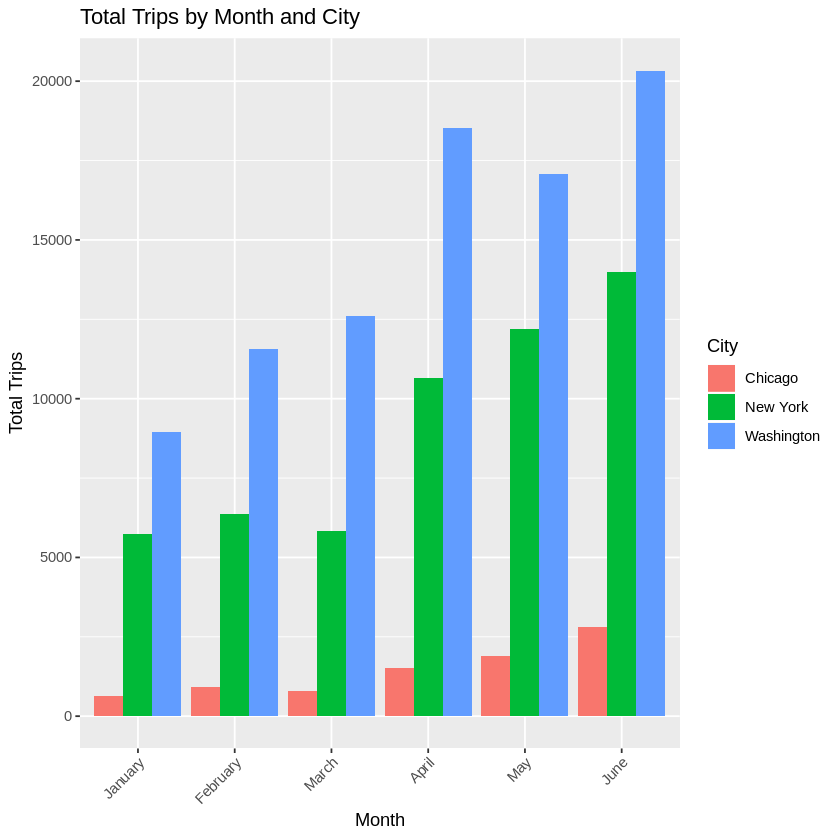

In [25]:
# Plot Bar Chart to compare total trips for the first 6 months
total_trips_by_month %>%
    ggplot(aes(x = factor(Month, levels = 1:6, labels = month.name[1:6]), y = Trips, fill = City)) +
    geom_bar(stat = 'identity', position = 'dodge') +
    labs(x = 'Month', y = 'Total Trips', fill = 'City', title = 'Total Trips by Month and City') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Summary of Question 1:
**June** is the business month for the first six months in all 3 cities. The chart shows a growing trend of bikeshare from January to June. The season was chaging from Winter to Spring and then Summer. Spring and Summer weathers are weather for people to ride bikes. The temperature affects the bikeshare business. More people use bikeshare in warm temperature.

### Question 2: Which city has the highest average ride time?

In [26]:
# Calculate the average ride time for each city
highest_average_ride_time <- df%>%
    group_by(City) %>%
    summarize(average_ride_time = mean(Trip.Duration, na.rm = TRUE)) %>%
    arrange(desc(average_ride_time))

print(highest_average_ride_time)

# A tibble: 3 x 2
  City       average_ride_time
  <chr>                  <dbl>
1 Washington             1234.
2 Chicago                 937.
3 New York                904.


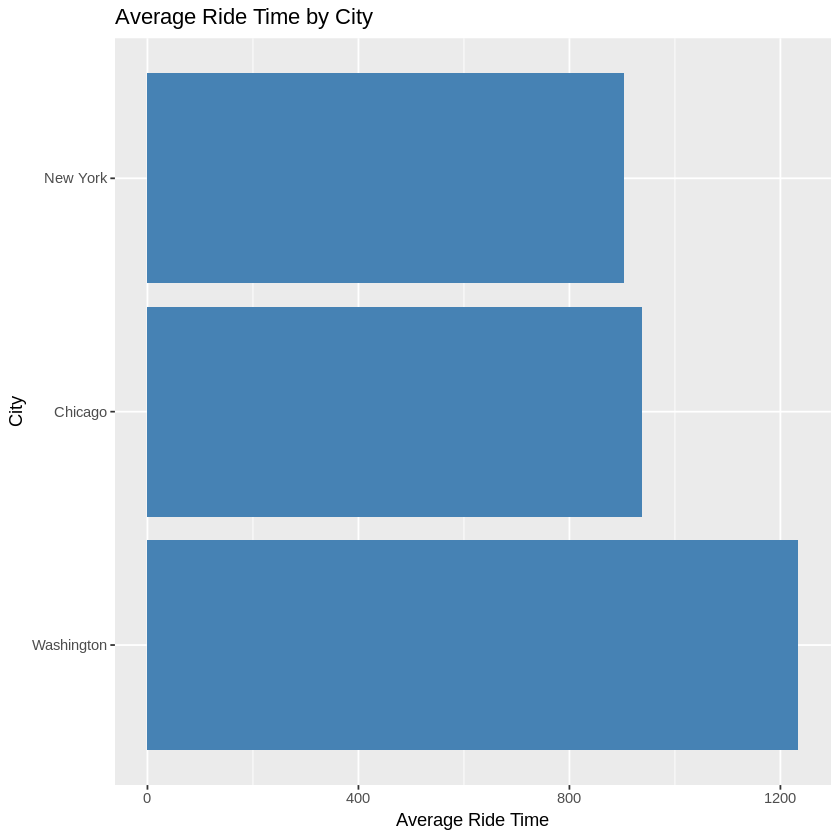

In [27]:
# Plot the highest average ride time for each city
highest_average_ride_time %>%
    ggplot(aes(x = reorder(City, -average_ride_time), y = average_ride_time, fill = City)) +
    geom_bar(stat = 'identity', fill = 'steelblue') +
    coord_flip() + 
    labs(x = 'City', y = 'Average Ride Time', title = 'Average Ride Time by City', fill = 'City:') +
    theme(legend.position = 'bottom')

Washington has the highest average ride time 1234 second, which is around 20 minutes. Chicago and New York have lower average ride time 937 and 934 seconds, which is around 15 minutes

#### Summary of Question 2:
**Washington** is the city with the highest average ride time. The average ride time is 1234 seconds. which is about 20 minutes. 

### Question 3: What user types does Washington have? How do users in Washington user bikeshare service

In [29]:
washington_users <- df %>%
    filter(City == 'Washington') %>%
    pull(User.Type) %>%
    unique()
print(washington_users)

[1] Subscriber Customer  
Levels:  Customer Subscriber


In [30]:
washington_users_type_counts <- df %>%
    filter(City == 'Washington') %>%
    group_by(User.Type) %>%
    count()
print(washington_users_type_counts)

# A tibble: 2 x 2
# Groups:   User.Type [2]
  User.Type      n
  <fct>      <int>
1 Customer   23450
2 Subscriber 65600


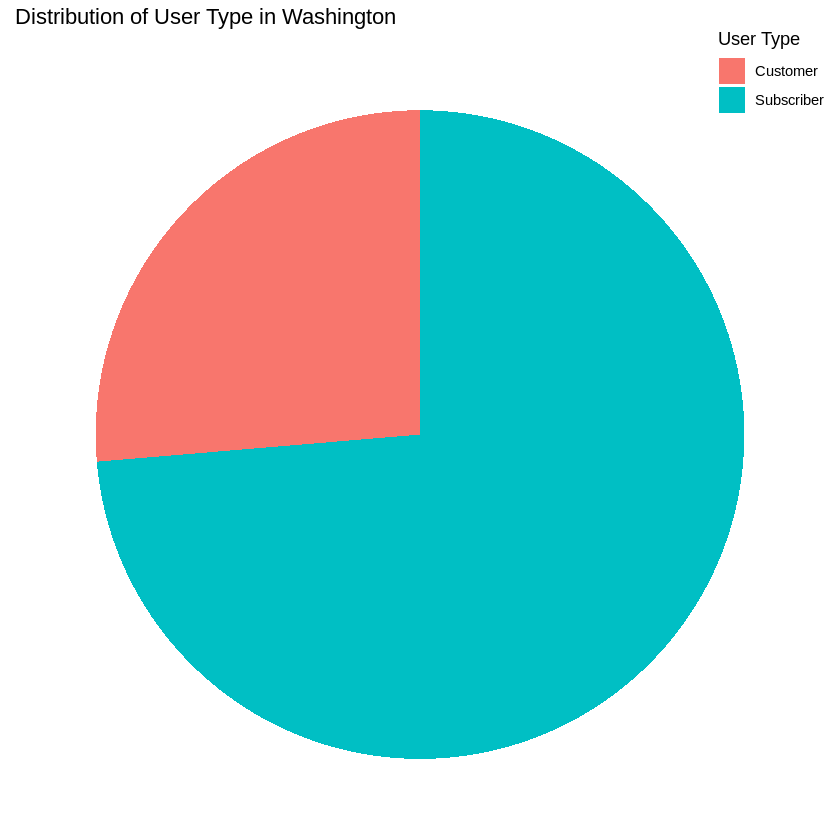

In [31]:
ggplot(washington_users_type_counts, aes(x = '', y = n, fill = User.Type)) +
    geom_bar(width = 1, stat = 'identity') +
    coord_polar(theta = 'y') +
    theme_void() + 
    labs(title = 'Distribution of User Type in Washington', fill = 'User Type') +
    theme(legend.position = c(1, 1), legend.justification = c('right' , 'top'))

I'm going to create new column called Hour. I'm going to extract hour from Start.Time column

In [32]:
# create new column for the hour of each trip
df$Hour <- lubridate::hour(df$Start.Time)
head(df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Month,Hour
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York,6,14
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York,5,15
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York,3,13
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York,5,19
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York,6,7
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York,2,18


I create a function to plot trips by hour and user type in a specified city. It can be **reused** to plot data for New York and Chicago quickly. In this question, we're only analyzing Washington.

In [33]:
# Function to plot trips by hour for a specified city
plot_hourly_trips <- function(df, city) {
  # Filter the data for the specified city
  df_city <- df[df$City == city,]

  # Calculate total trips by hour and user type
  trips_by_hour <- df_city %>%
    group_by(Hour, User.Type) %>%
    summarize(Trips = n(), .groups = 'drop')

  # Plot the chart
  plot <- ggplot(trips_by_hour, aes(x = Hour, y = Trips, fill = User.Type)) +
    geom_bar(stat = 'identity', position = 'dodge') +
    labs(x= 'Hour of the Day', y = 'Number of Trips', fill = 'User Type', title = paste('Trips by hour and User Type in', city)) +
    scale_x_continuous(breaks = seq(0,23,1))
  
  return(plot)
}

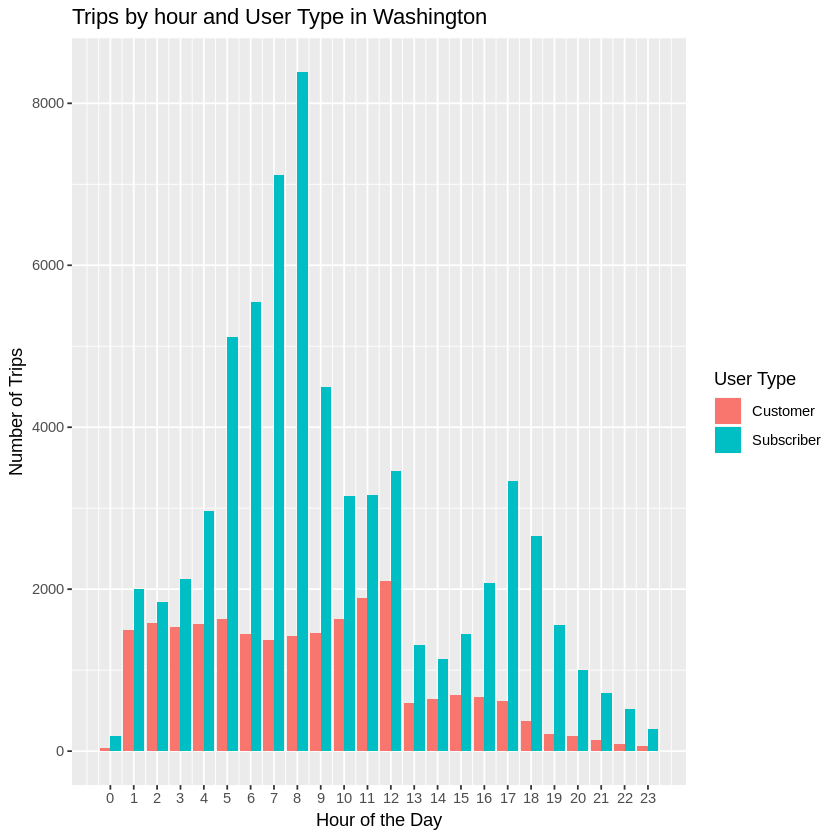

In [34]:
# call function plot_hourly_trip to plot data for Washington
plot_hourly_trips(df, 'Washington')

#### Summary of Question 3:
**Washington** users are **Customers** and **Subcribers**. Over 70% of users in Washington are subcribers. Subcriber use bikeshare service peaks during rush hours. The service peaks at 7 and 8, the timeframe that most people go to work. The service slows down and peaks again at 17 and 18 when people leaves work. Customers tend to use the service very early during the day. The result shows a probabilty that subcribers use bikeshare service to commute to work. However, in order to conclude the theory, more research needs to be done. 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [35]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')